# Credit One Data (Loan Default) - Regression
1. This data analysis uses **regression** on a preprocessed, cleansed and validated dataset. 
2. Only a subset (3.33%) of the rows were used and a 70 and 30 split were used for training and testing sets, respectively.
3. Models used - **Linear Regression**, **Random Forest** and **Support Vector Regression (SVR)** - Optimal algorithm chosen.

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')               # Put this before importing pandas
import seaborn as sns
import pandas as pd
credit = pd.read_csv('CreditOne_Clean.csv', header = 0) 

In [3]:
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt


# Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross validation
from sklearn.cross_validation import train_test_split

In [4]:
credit.info()
credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 90 columns):
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
age_group                     30000 non-null object
loanbal_grp                   30000 non-null object
SEX_1                         30000 non-null float64
SEX_2                         30000 non-null float64
EDUCATION_0                   30000 non-null float64
EDUCATION_1     

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,689,0,0,689,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120000,26,2682,2682,3261,0,1000,1000,1000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90000,34,29239,13559,15549,1518,1500,1000,1000,1000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50000,37,46990,49291,29547,2000,2019,1200,1100,1069,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000,57,8617,35835,19131,2000,36681,10000,9000,689,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
credit_ShowMissingCol = credit.iloc[:,10:80]      # showing partial missing columns from above
credit_ShowMissingCol.head()

,PAY_AMT6,default payment next month,age_group,loanbal_grp,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,...,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8
0,0,1,0-25,0-200k,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,1,26-50,0-200k,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,26-50,0-200k,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000,0,26-50,0-200k,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,679,0,51-75,0-200k,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
credit_ShowMissingCol_2 = credit.iloc[:,20:70]      # showing partial missing columns from above
credit_ShowMissingCol_2.head()

,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,...,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
credit_ShowMissingCol_3 = credit.iloc[:,30:60]     # showing partial missing columns from above
credit_ShowMissingCol_3.head() 

,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,...,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
credit_ShowMissingCol_4 = credit.iloc[:,40:50]     # showing partial missing columns from above
credit_ShowMissingCol_4.head() 

,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_8,PAY_3_-2,PAY_3_-1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# make another copy
credit_SelDiv = credit
credit_SelDiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 90 columns):
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
age_group                     30000 non-null object
loanbal_grp                   30000 non-null object
SEX_1                         30000 non-null float64
SEX_2                         30000 non-null float64
EDUCATION_0                   30000 non-null float64
EDUCATION_1     

In [10]:
#features
features = credit_SelDiv.iloc[:,2:11]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,689,0,0,689,0,0,0,0
1,2682,2682,3261,0,1000,1000,1000,0,2000
2,29239,13559,15549,1518,1500,1000,1000,1000,5000
3,46990,49291,29547,2000,2019,1200,1100,1069,1000
4,8617,35835,19131,2000,36681,10000,9000,689,679


In [11]:
#dependent variable
depVar = credit_SelDiv['PAY_AMT6']  # choose a column that is not in a classification/dummy variable datatype (ex.default payment next month )

In [12]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,689,0,0,689,0,0,0,0
1,2682,2682,3261,0,1000,1000,1000,0,2000
2,29239,13559,15549,1518,1500,1000,1000,1000,5000
3,46990,49291,29547,2000,2019,1200,1100,1069,1000
4,8617,35835,19131,2000,36681,10000,9000,689,679


In [13]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]                             # only analyzing a subset of the rows (3.33%)
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()                                                                     # displays 'PAY_AMT6' 5 values

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [14]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT3  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
29900      16809          0          0         0         0         0   
29901      50845     103486      49387         0      6556      3250   
29902      10392     168955     124746    168096      6409      7335   
29903      27378      13333     172104     10018     13333        99   
29904      54952      54126      59728      2600      4553      5800   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0  
29901      1563      1208       781  
29902      4448      4519      5003  
29903        99    172104     30013  
29904      2000      1000      1462  


In [15]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [16]:
# implement Cross Validation anytime we need to by simply running the following on the X and Y training sets:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

In [17]:
# We can also use the shape function to double check that the split was made as needed:

X_train.shape, X_test.shape

((700, 9), (300, 9))

In [18]:
#Models
modelSVR = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


modelRF = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

modelLR = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#dependent variable
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, dtype: int64


In [20]:
# Use the model variables you established earlier to  pass the training data to them in the following format:

# Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
#Support Vector Regression
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
#Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# Rate each model
#These values correspond to the the following:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split. 


In [23]:
print(cross_val_score(modelRF, X_train, y_train))      # This shows the best results for the cross validation

[ 0.87479874  0.60412361  0.97715699]


In [24]:
print(cross_val_score(modelSVR, X_train, y_train))     # since only a subset was used, may not yield optimal results

[-0.04707863 -0.01359468 -0.04864894]


In [25]:
print(cross_val_score(modelLR, X_train, y_train))      # overfit

[ 1.  1.  1.]


In [26]:
# With the chosen  model (RF), use it to make predictions

predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.955
RMSE: 3441.955


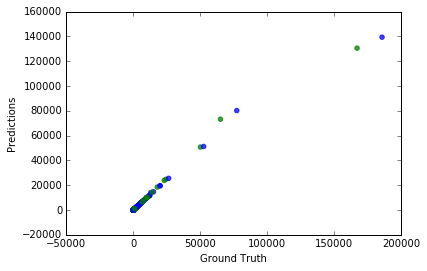

In [27]:
# The line below is for the plots to show (i.e. not in a separate window)
%matplotlib inline   

plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.75)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();